# Deep Learning Assignment - EEG Classification

Classification of EEG signal based on different bands - Alpha, Beta, Gamma, Omega , Delta, Theta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Step 1 : Load Data and Explore Data

In [0]:
import pickle as pk
import pandas as pd 
import numpy as np 

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/DeepLearningAssignment/Data/'
data = open(path + 'Data_Raw_signals.pkl','rb')
data_raw = pk.load(data) 
test = open(path + 'Test_Raw_signals_no_labels.pkl','rb')
test_raw = pk.load(test) 

In [0]:
data = data_raw[0]
labels = data_raw[1]
test_data = test_raw[0]

In [0]:
data = np.reshape(data,(15375,3000,2))
test_data = np.reshape(test_data,(1754,3000,2))

In [0]:
data_whole = np.concatenate((data,test_data),axis=0)

In [7]:
data_whole.shape

(17129, 3000, 2)

In [0]:
#Take difference of two eletrodes to get one signal

data_whole = data_whole[:,:,0] - data_whole[:,:,1]

# Explore Single Singnal

In [0]:
single_sig = data_whole[0]

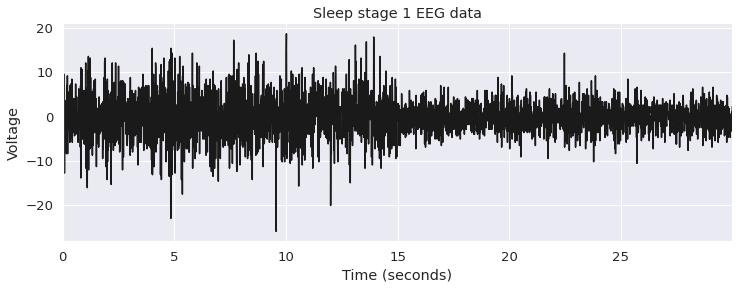

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 100.
time = np.arange(single_sig.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, single_sig, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('Sleep stage 1 EEG data')
sns.despine()

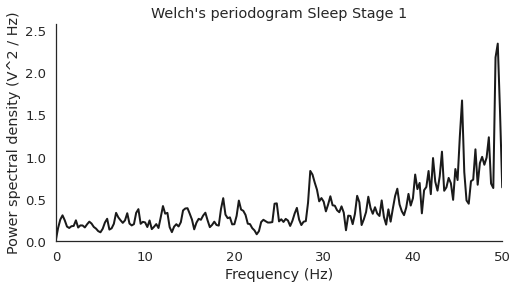

In [11]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(single_sig, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram Sleep Stage 1")
plt.xlim([0, freqs.max()])
sns.despine()

# Displaying One Band -> Delta (0.5-4 Hz)

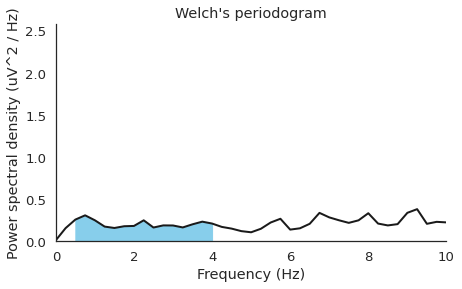

In [12]:
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

# Theta Band (4-8 Hz)

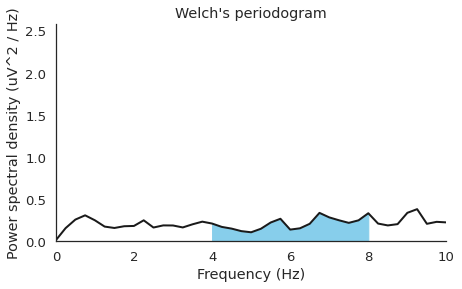

In [13]:
low, high = 4, 8

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

# Alpha Band (8 - 13 Hz)

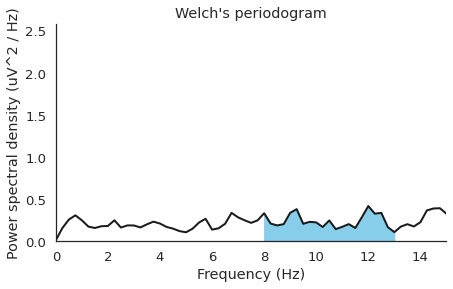

In [14]:
low, high = 8, 13

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 15])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

# Beta Band (13 - 30 Hz)

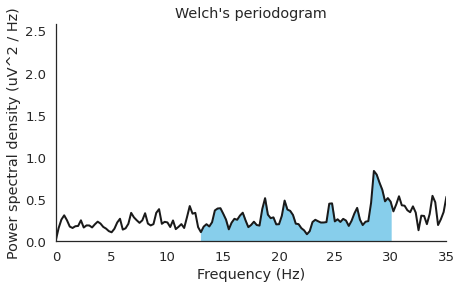

In [15]:
low, high = 13, 30

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 35])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

# Gamma band (30 - 90 Hz)

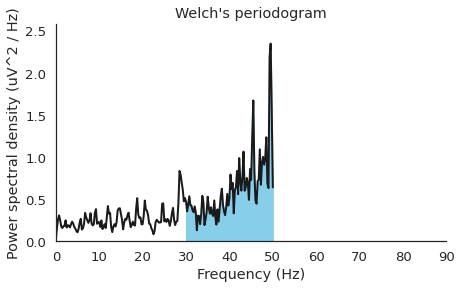

In [16]:
low, high = 30, 90

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 90])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

# Step 2 : Signal Decomposition

In [0]:
import pywt

In [18]:
pywt.dwt_max_level(3000,'db4')

8

In [0]:
data_whole = np.reshape(data_whole,(17129,3000,1))

In [0]:
def _wavelet_coefs(data, wavelet_name='db4'):
    wavelet = pywt.Wavelet(wavelet_name)
    levdec = min(pywt.dwt_max_level(data.shape[0], wavelet.dec_len), 6)
    coefs = pywt.wavedec(data, wavelet=wavelet, level=levdec)
    return coefs 

In [21]:
decom_coeff = _wavelet_coefs(data_whole, wavelet_name='db4')

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [0]:
cD1 = decom_coeff[0]
cD2 = decom_coeff[1]
cD3 = decom_coeff[2]
cD4 = decom_coeff[3]
cD5 = decom_coeff[4]
cD6 = decom_coeff[5]
cA = decom_coeff[6]

In [23]:
print(cD1.shape)
print(cD2.shape)
print(cD3.shape)
print(cD4.shape)
print(cD5.shape)
print(cD6.shape)
print(cA.shape)

(17129, 3000, 6)
(17129, 3000, 6)
(17129, 3000, 6)
(17129, 3000, 6)
(17129, 3000, 6)
(17129, 3000, 5)
(17129, 3000, 4)


# Calculate : Average or Relative Band Power

In [0]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

# Define PCA Components

In [0]:
from sklearn.decomposition import PCA


# Average band Power For Delta Band

# 1st Decomposition coefficient

In [0]:
cD1_delta_bd = np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))

for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sig_cD = cD1[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD1_delta_bd[i,:,j] = bd

cD1_delta_bd = np.reshape(cD1_delta_bd,(17129,cD1_delta_bd.shape[2]))
deltacD1_df = pd.DataFrame(cD1_delta_bd)

# 2nd Decomp coeff

In [0]:
cD2_delta_bd = np.ndarray(shape = (cD2.shape[0],1,cD2.shape[2]))

for i in range(cD2.shape[0]):
    for j in range(cD2.shape[2]):
        sig_cD = cD2[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD2_delta_bd[i,:,j] = bd

cD2_delta_bd = np.reshape(cD2_delta_bd,(17129,cD2_delta_bd.shape[2]))
deltacD2_df = pd.DataFrame(cD2_delta_bd)

# 3rd Decomp coeff

In [0]:
cD3_delta_bd = np.ndarray(shape = (cD3.shape[0],1,cD3.shape[2]))

for i in range(cD3.shape[0]):
    for j in range(cD3.shape[2]):
        sig_cD = cD3[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD3_delta_bd[i,:,j] = bd

cD3_delta_bd = np.reshape(cD3_delta_bd,(17129,cD3_delta_bd.shape[2]))
deltacD3_df = pd.DataFrame(cD3_delta_bd)

# 4th Decomp Coeff

In [0]:
cD4_delta_bd = np.ndarray(shape = (cD4.shape[0],1,cD4.shape[2]))

for i in range(cD4.shape[0]):
    for j in range(cD4.shape[2]):
        sig_cD = cD4[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD4_delta_bd[i,:,j] = bd

cD4_delta_bd = np.reshape(cD4_delta_bd,(17129,cD4_delta_bd.shape[2]))
deltacD4_df = pd.DataFrame(cD4_delta_bd)

# 5th Decom Coeff

In [0]:
cD5_delta_bd = np.ndarray(shape = (cD5.shape[0],1,cD5.shape[2]))

for i in range(cD5.shape[0]):
    for j in range(cD5.shape[2]):
        sig_cD = cD5[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD5_delta_bd[i,:,j] = bd

cD5_delta_bd = np.reshape(cD5_delta_bd,(17129,cD5_delta_bd.shape[2]))
deltacD5_df = pd.DataFrame(cD5_delta_bd)

# 6th Decomp Coeff

In [0]:
cD6_delta_bd = np.ndarray(shape = (cD6.shape[0],1,cD6.shape[2]))

for i in range(cD6.shape[0]):
    for j in range(cD6.shape[2]):
        sig_cD = cD6[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cD6_delta_bd[i,:,j] = bd

cD6_delta_bd = np.reshape(cD6_delta_bd,(17129,cD6_delta_bd.shape[2]))
deltacD6_df = pd.DataFrame(cD6_delta_bd)

# Approximation 

In [0]:
cA_delta_bd = np.ndarray(shape = (cA.shape[0],1,cA.shape[2]))

for i in range(cA.shape[0]):
    for j in range(cA.shape[2]):
        sig_cD = cA[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(.5,4), window_sec=None, relative=False)
        cA_delta_bd[i,:,j] = bd

cA_delta_bd = np.reshape(cA_delta_bd,(17129,cA_delta_bd.shape[2]))
deltacA_df = pd.DataFrame(cA_delta_bd)

In [0]:
delta_df = pd.concat((deltacD1_df, deltacD2_df, deltacD3_df, deltacD4_df,
                      deltacD5_df, deltacD6_df, deltacA_df),axis=1)

# Perform PCA on each  delta 

cD1_delta_bd    
cD2_delta_bd    
cD3_delta_bd    
cD4_delta_bd   
cD5_delta_bd   
cD6_delta_bd  
cA_delta_bd   

In [0]:
pca = PCA(n_components=1)

cD1_delta_bd = pca.fit_transform(cD1_delta_bd)
cD1_pc_delta = pd.DataFrame(data = cD1_delta_bd,columns = ['PC1'])

cD2_delta_bd = pca.fit_transform(cD2_delta_bd)
cD2_pc_delta = pd.DataFrame(data = cD2_delta_bd,columns = ['PC2'])

cD3_delta_bd = pca.fit_transform(cD3_delta_bd)
cD3_pc_delta = pd.DataFrame(data = cD3_delta_bd,columns = ['PC3'])

cD4_delta_bd = pca.fit_transform(cD4_delta_bd)
cD4_pc_delta = pd.DataFrame(data = cD4_delta_bd,columns = ['PC4'])

cD5_delta_bd = pca.fit_transform(cD5_delta_bd)
cD5_pc_delta = pd.DataFrame(data = cD5_delta_bd,columns = ['PC5'])

cD6_delta_bd = pca.fit_transform(cD6_delta_bd)
cD6_pc_delta = pd.DataFrame(data = cD6_delta_bd,columns = ['PC6'])

cA_delta_bd = pca.fit_transform(cA_delta_bd)
cA_pc_delta = pd.DataFrame(data = cA_delta_bd,columns = ['PC7'])

In [0]:
pca_delta_df = pd.concat((cD1_pc_delta,cD2_pc_delta,cD3_pc_delta,
                          cD4_pc_delta,cD5_pc_delta,cD6_pc_delta,cA_pc_delta),axis=1)

In [36]:
pca_delta_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-5987.231283,-2.103834e-29,-1.134869e-29,-6.300271e-30,-3.467544e-30,-6.604178e-31,-2.431474e-31
1,-5998.468776,-2.110502e-29,-1.143345e-29,-6.337722e-30,-3.492285e-30,-6.691087e-31,-2.436161e-31
2,-5982.448313,-2.114496e-29,-1.139834e-29,-6.323431e-30,-3.497768e-30,-6.662744e-31,-2.437549e-31
3,-6003.035382,-2.097074e-29,-1.141400e-29,-6.289062e-30,-3.482001e-30,-6.619322e-31,-2.433559e-31
4,-5979.170332,-2.088397e-29,-1.133532e-29,-6.247631e-30,-3.451029e-30,-6.617792e-31,-2.433249e-31


# Theta band Power Band

In [0]:
cD1_theta_bd = np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))
for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sig_cD = cD1[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD1_theta_bd[i,:,j] = bd

cD1_theta_bd = np.reshape(cD1_theta_bd,(17129,cD1_theta_bd.shape[2]))
thetacD1_df = pd.DataFrame(cD1_theta_bd)

#####
cD2_theta_bd = np.ndarray(shape = (cD2.shape[0],1,cD2.shape[2]))
for i in range(cD2.shape[0]):
    for j in range(cD2.shape[2]):
        sig_cD = cD2[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD2_theta_bd[i,:,j] = bd

cD2_theta_bd = np.reshape(cD2_theta_bd,(17129,cD2_theta_bd.shape[2]))
thetacD2_df = pd.DataFrame(cD2_theta_bd)

####

cD3_theta_bd = np.ndarray(shape = (cD3.shape[0],1,cD3.shape[2]))

for i in range(cD3.shape[0]):
    for j in range(cD3.shape[2]):
        sig_cD = cD3[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD3_theta_bd[i,:,j] = bd

cD3_theta_bd = np.reshape(cD3_theta_bd,(17129,cD3_theta_bd.shape[2]))
thetacD3_df = pd.DataFrame(cD3_theta_bd)

####

cD4_theta_bd = np.ndarray(shape = (cD4.shape[0],1,cD4.shape[2]))

for i in range(cD4.shape[0]):
    for j in range(cD4.shape[2]):
        sig_cD = cD4[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD4_theta_bd[i,:,j] = bd

cD4_theta_bd = np.reshape(cD4_theta_bd,(17129,cD4_theta_bd.shape[2]))
thetacD4_df = pd.DataFrame(cD4_theta_bd)

###
cD5_theta_bd = np.ndarray(shape = (cD5.shape[0],1,cD5.shape[2]))

for i in range(cD5.shape[0]):
    for j in range(cD5.shape[2]):
        sig_cD = cD5[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD5_theta_bd[i,:,j] = bd

cD5_theta_bd = np.reshape(cD5_theta_bd,(17129,cD5_theta_bd.shape[2]))
thetacD5_df = pd.DataFrame(cD5_theta_bd)

###

cD6_theta_bd = np.ndarray(shape = (cD6.shape[0],1,cD6.shape[2]))

for i in range(cD6.shape[0]):
    for j in range(cD6.shape[2]):
        sig_cD = cD6[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cD6_theta_bd[i,:,j] = bd

cD6_theta_bd = np.reshape(cD6_theta_bd,(17129,cD6_theta_bd.shape[2]))
thetacD6_df = pd.DataFrame(cD6_theta_bd)

##

cA_theta_bd = np.ndarray(shape = (cA.shape[0],1,cA.shape[2]))

for i in range(cA.shape[0]):
    for j in range(cA.shape[2]):
        sig_cD = cA[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(4,8), window_sec=None, relative=False)
        cA_theta_bd[i,:,j] = bd

cA_theta_bd = np.reshape(cA_theta_bd,(17129,cA_theta_bd.shape[2]))
thetacA_df = pd.DataFrame(cA_theta_bd)


In [0]:
pca = PCA(n_components=1)

cD1_theta_bd = pca.fit_transform(cD1_theta_bd)
cD1_pc_theta = pd.DataFrame(data = cD1_theta_bd,columns = ['PC1'])

cD2_theta_bd = pca.fit_transform(cD2_theta_bd)
cD2_pc_theta = pd.DataFrame(data = cD2_theta_bd,columns = ['PC2'])

cD3_theta_bd = pca.fit_transform(cD3_theta_bd)
cD3_pc_theta = pd.DataFrame(data = cD3_theta_bd,columns = ['PC3'])

cD4_theta_bd = pca.fit_transform(cD4_theta_bd)
cD4_pc_theta = pd.DataFrame(data = cD4_theta_bd,columns = ['PC4'])

cD5_theta_bd = pca.fit_transform(cD5_theta_bd)
cD5_pc_theta = pd.DataFrame(data = cD5_theta_bd,columns = ['PC5'])

cD6_theta_bd = pca.fit_transform(cD6_theta_bd)
cD6_pc_theta = pd.DataFrame(data = cD6_theta_bd,columns = ['PC6'])

cA_theta_bd = pca.fit_transform(cA_theta_bd)
cA_pc_theta = pd.DataFrame(data = cA_theta_bd,columns = ['PC7'])


In [0]:
pca_theta_df = pd.concat((cD1_pc_theta,cD2_pc_theta,cD3_pc_theta,
                          cD4_pc_theta,cD5_pc_theta,cD6_pc_theta,cA_pc_theta),axis=1)

In [40]:
pca_theta_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-7472.459067,-2.378931e-29,-1.324914e-29,-7.293846e-30,-3.798985e-30,-7.556801e-31,-2.845751e-31
1,-7461.202934,-2.388216e-29,-1.334506e-29,-7.356474e-30,-3.832996e-30,-7.604849e-31,-2.839495e-31
2,-7473.135136,-2.395486e-29,-1.336788e-29,-7.322325e-30,-3.835742e-30,-7.608624e-31,-2.862642e-31
3,-7466.938221,-2.368730e-29,-1.338907e-29,-7.310643e-30,-3.828876e-30,-7.558444e-31,-2.859603e-31
4,-7457.140105,-2.350225e-29,-1.334617e-29,-7.285346e-30,-3.822627e-30,-7.554942e-31,-2.821675e-31


In [0]:
theta_df = pd.concat((thetacD1_df, thetacD2_df, thetacD3_df, thetacD4_df,
                      thetacD5_df, thetacD6_df, thetacA_df),axis=1)

# Alpha BandPower

In [0]:
###
cD1_alpha_bd = np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))

for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sig_cD = cD1[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD1_alpha_bd[i,:,j] = bd

cD1_alpha_bd = np.reshape(cD1_alpha_bd,(17129,cD1_alpha_bd.shape[2]))
alphacD1_df = pd.DataFrame(cD1_alpha_bd)

####

cD2_alpha_bd = np.ndarray(shape = (cD2.shape[0],1,cD2.shape[2]))

for i in range(cD2.shape[0]):
    for j in range(cD2.shape[2]):
        sig_cD = cD2[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD2_alpha_bd[i,:,j] = bd

cD2_alpha_bd = np.reshape(cD2_alpha_bd,(17129,cD2_alpha_bd.shape[2]))
alphacD2_df = pd.DataFrame(cD2_alpha_bd)

####

cD3_alpha_bd = np.ndarray(shape = (cD3.shape[0],1,cD3.shape[2]))

for i in range(cD3.shape[0]):
    for j in range(cD3.shape[2]):
        sig_cD = cD3[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD3_alpha_bd[i,:,j] = bd

cD3_alpha_bd = np.reshape(cD3_alpha_bd,(17129,cD3_alpha_bd.shape[2]))
alphacD3_df = pd.DataFrame(cD3_alpha_bd)

####

cD4_alpha_bd = np.ndarray(shape = (cD4.shape[0],1,cD4.shape[2]))

for i in range(cD4.shape[0]):
    for j in range(cD4.shape[2]):
        sig_cD = cD4[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD4_alpha_bd[i,:,j] = bd

cD4_alpha_bd = np.reshape(cD4_alpha_bd,(17129,cD4_alpha_bd.shape[2]))
alphacD4_df = pd.DataFrame(cD4_alpha_bd)

###
cD5_alpha_bd = np.ndarray(shape = (cD5.shape[0],1,cD5.shape[2]))

for i in range(cD5.shape[0]):
    for j in range(cD5.shape[2]):
        sig_cD = cD5[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD5_alpha_bd[i,:,j] = bd

cD5_alpha_bd = np.reshape(cD5_alpha_bd,(17129,cD5_alpha_bd.shape[2]))
alphacD5_df = pd.DataFrame(cD5_alpha_bd)

###

cD6_alpha_bd = np.ndarray(shape = (cD6.shape[0],1,cD6.shape[2]))

for i in range(cD6.shape[0]):
    for j in range(cD6.shape[2]):
        sig_cD = cD6[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cD6_alpha_bd[i,:,j] = bd

cD6_alpha_bd = np.reshape(cD6_alpha_bd,(17129,cD6_alpha_bd.shape[2]))
alphacD6_df = pd.DataFrame(cD6_alpha_bd)

###


cA_alpha_bd = np.ndarray(shape = (cA.shape[0],1,cA.shape[2]))

for i in range(cA.shape[0]):
    for j in range(cA.shape[2]):
        sig_cD = cA[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(8,13), window_sec=None, relative=False)
        cA_alpha_bd[i,:,j] = bd

cA_alpha_bd = np.reshape(cA_alpha_bd,(17129,cA_alpha_bd.shape[2]))
alphacA_df = pd.DataFrame(cA_alpha_bd)


In [0]:
pca = PCA(n_components=1)

cD1_alpha_bd = pca.fit_transform(cD1_alpha_bd)
cD1_pc_alpha = pd.DataFrame(data = cD1_alpha_bd,columns = ['PC1'])

cD2_alpha_bd = pca.fit_transform(cD2_alpha_bd)
cD2_pc_alpha = pd.DataFrame(data = cD2_alpha_bd,columns = ['PC2'])

cD3_alpha_bd = pca.fit_transform(cD3_alpha_bd)
cD3_pc_alpha = pd.DataFrame(data = cD3_alpha_bd,columns = ['PC3'])

cD4_alpha_bd = pca.fit_transform(cD4_alpha_bd)
cD4_pc_alpha = pd.DataFrame(data = cD4_alpha_bd,columns = ['PC4'])

cD5_alpha_bd = pca.fit_transform(cD5_alpha_bd)
cD5_pc_alpha = pd.DataFrame(data = cD5_alpha_bd,columns = ['PC5'])

cD6_alpha_bd = pca.fit_transform(cD6_alpha_bd)
cD6_pc_alpha = pd.DataFrame(data = cD6_alpha_bd,columns = ['PC6'])

cA_alpha_bd = pca.fit_transform(cA_alpha_bd)
cA_pc_alpha = pd.DataFrame(data = cA_alpha_bd,columns = ['PC7'])


In [0]:
pca_alpha_df = pd.concat((cD1_pc_alpha,cD2_pc_alpha,cD3_pc_alpha,
                          cD4_pc_alpha,cD5_pc_alpha,cD6_pc_alpha,cA_pc_alpha),axis=1)


In [0]:
alpha_df = pd.concat((alphacD1_df, alphacD2_df, alphacD3_df, 
                     alphacD4_df, alphacD5_df, alphacD6_df, alphacA_df),axis = 1)

In [46]:
alpha_df.head()

,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,0,1,2,3
0,62.952169,62.952169,62.952169,62.952169,62.952169,62.952169,2.072381e-31,6.014995e-31,5.722628e-31,2.484935e-31,4.395363e-31,4.094293e-31,1.207246e-31,2.284223e-31,3.970110e-31,1.175752e-31,2.621023e-31,2.424415e-31,5.590231e-32,2.387760e-31,5.056111e-32,3.339309e-32,6.474877e-32,2.040229e-31,2.782550e-32,4.032702e-32,8.193654e-32,1.197172e-31,3.779036e-32,2.858975e-32,9.987412e-33,1.201971e-32,1.165221e-32,1.159540e-32,1.044602e-32,5.380705e-33,4.570393e-33,5.440835e-33,5.993285e-33
1,55.904235,55.904235,55.904235,55.904235,55.904235,55.904235,1.857789e-31,5.049496e-31,5.245890e-31,1.934041e-31,3.701292e-31,3.324117e-31,1.445749e-31,1.978916e-31,3.140988e-31,1.211710e-31,2.147406e-31,1.952852e-31,5.122870e-32,1.737480e-31,4.536697e-32,2.841628e-32,3.534559e-32,1.575840e-31,2.655833e-32,3.955227e-32,7.248475e-32,1.038455e-31,2.899532e-32,2.663548e-32,7.498467e-33,1.077811e-32,9.974586e-33,7.768842e-33,7.960829e-33,4.911628e-33,4.455596e-33,4.996235e-33,6.086837e-33
2,61.133812,61.133812,61.133812,61.133812,61.133812,61.133812,1.698208e-31,4.494996e-31,4.974878e-31,2.215608e-31,3.285682e-31,3.511054e-31,1.082591e-31,1.965428e-31,3.211172e-31,8.797617e-32,2.478874e-31,1.746470e-31,5.089076e-32,2.007308e-31,4.862564e-32,3.029246e-32,3.855230e-32,1.649466e-31,2.408112e-32,3.453163e-32,7.554544e-32,9.845606e-32,2.854347e-32,2.499635e-32,8.112270e-33,9.488515e-33,1.016761e-32,7.812243e-33,8.180315e-33,4.117947e-33,3.673529e-33,4.567017e-33,4.769734e-33
3,48.294988,48.294988,48.294988,48.294988,48.294988,48.294988,2.182767e-31,7.232479e-31,5.976983e-31,2.072693e-31,4.720440e-31,4.032705e-31,1.271080e-31,1.932632e-31,3.493741e-31,9.412581e-32,2.172806e-31,1.652059e-31,5.001298e-32,2.067236e-31,4.749446e-32,3.668106e-32,4.752775e-32,2.050697e-31,2.488667e-32,4.050466e-32,6.524646e-32,9.458737e-32,4.102556e-32,2.715362e-32,9.021513e-33,1.351039e-32,9.225774e-33,9.641817e-33,9.574758e-33,3.883976e-33,3.784151e-33,4.587695e-33,5.181458e-33
4,56.056686,56.056686,56.056686,56.056686,56.056686,56.056686,2.584265e-31,7.435106e-31,7.093627e-31,2.896179e-31,5.663709e-31,4.504594e-31,1.384884e-31,2.387440e-31,4.239754e-31,1.314515e-31,2.786441e-31,2.209480e-31,6.706731e-32,2.400040e-31,6.972996e-32,4.243742e-32,5.778288e-32,2.071670e-31,2.552823e-32,4.728988e-32,8.182676e-32,1.264673e-31,4.181244e-32,2.579831e-32,1.028239e-32,1.459579e-32,1.244046e-32,1.002636e-32,1.018139e-32,5.495682e-33,5.368823e-33,6.345692e-33,6.829627e-33


## Beta BandPower

In [0]:

##
cD1_beta_bd = np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))

for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sig_cD = cD1[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD1_beta_bd[i,:,j] = bd

cD1_beta_bd = np.reshape(cD1_beta_bd,(17129,cD1_beta_bd.shape[2]))
betacD1_df = pd.DataFrame(cD1_beta_bd)

##

cD2_beta_bd = np.ndarray(shape = (cD2.shape[0],1,cD2.shape[2]))
for i in range(cD2.shape[0]):
    for j in range(cD2.shape[2]):
        sig_cD = cD2[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD2_beta_bd[i,:,j] = bd

cD2_beta_bd = np.reshape(cD2_beta_bd,(17129,cD2_beta_bd.shape[2]))
betacD2_df = pd.DataFrame(cD2_beta_bd)

##
cD3_beta_bd = np.ndarray(shape = (cD3.shape[0],1,cD3.shape[2]))
for i in range(cD3.shape[0]):
    for j in range(cD3.shape[2]):
        sig_cD = cD3[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD3_beta_bd[i,:,j] = bd

cD3_beta_bd = np.reshape(cD3_beta_bd,(17129,cD3_beta_bd.shape[2]))
betacD3_df = pd.DataFrame(cD3_beta_bd)

##
cD4_beta_bd = np.ndarray(shape = (cD4.shape[0],1,cD4.shape[2]))
for i in range(cD4.shape[0]):
    for j in range(cD4.shape[2]):
        sig_cD = cD4[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD4_beta_bd[i,:,j] = bd

cD4_beta_bd = np.reshape(cD4_beta_bd,(17129,cD4_beta_bd.shape[2]))
betacD4_df = pd.DataFrame(cD4_beta_bd)

##
cD5_beta_bd = np.ndarray(shape = (cD5.shape[0],1,cD5.shape[2]))
for i in range(cD5.shape[0]):
    for j in range(cD5.shape[2]):
        sig_cD = cD5[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD5_beta_bd[i,:,j] = bd

cD5_beta_bd = np.reshape(cD5_beta_bd,(17129,cD5_beta_bd.shape[2]))
betacD5_df = pd.DataFrame(cD5_beta_bd)


##
cD6_beta_bd = np.ndarray(shape = (cD6.shape[0],1,cD6.shape[2]))
for i in range(cD6.shape[0]):
    for j in range(cD6.shape[2]):
        sig_cD = cD6[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cD6_beta_bd[i,:,j] = bd

cD6_beta_bd = np.reshape(cD6_beta_bd,(17129,cD6_beta_bd.shape[2]))
betacD6_df = pd.DataFrame(cD6_beta_bd)

##
cA_beta_bd = np.ndarray(shape = (cA.shape[0],1,cA.shape[2]))
for i in range(cA.shape[0]):
    for j in range(cA.shape[2]):
        sig_cD = cA[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(13,30), window_sec=None, relative=False)
        cA_beta_bd[i,:,j] = bd

cA_beta_bd = np.reshape(cA_beta_bd,(17129,cA_beta_bd.shape[2]))
betacA_df = pd.DataFrame(cA_beta_bd)


In [0]:
pca = PCA(n_components=1)

cD1_beta_bd = pca.fit_transform(cD1_beta_bd)
cD1_pc_beta = pd.DataFrame(data = cD1_beta_bd,columns = ['PC1'])

cD2_beta_bd = pca.fit_transform(cD2_beta_bd)
cD2_pc_beta = pd.DataFrame(data = cD2_beta_bd,columns = ['PC2'])

cD3_beta_bd = pca.fit_transform(cD3_beta_bd)
cD3_pc_beta = pd.DataFrame(data = cD3_beta_bd,columns = ['PC3'])

cD4_beta_bd = pca.fit_transform(cD4_beta_bd)
cD4_pc_beta = pd.DataFrame(data = cD4_beta_bd,columns = ['PC4'])

cD5_beta_bd = pca.fit_transform(cD5_beta_bd)
cD5_pc_beta = pd.DataFrame(data = cD5_beta_bd,columns = ['PC5'])

cD6_beta_bd = pca.fit_transform(cD6_beta_bd)
cD6_pc_beta = pd.DataFrame(data = cD6_beta_bd,columns = ['PC6'])

cA_beta_bd = pca.fit_transform(cA_beta_bd)
cA_pc_beta = pd.DataFrame(data = cA_beta_bd,columns = ['PC7'])


In [0]:
pca_beta_df = pd.concat((cD1_pc_beta,cD2_pc_beta,cD3_pc_beta,
                          cD4_pc_beta,cD5_pc_beta,cD6_pc_beta,cA_pc_beta),axis=1)


In [50]:
pca_beta_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-29755.839113,-7.792247e-29,-4.417688e-29,-2.341886e-29,-1.281749e-29,-2.416459e-30,-1.004848e-30
1,-29699.102204,-7.809091e-29,-4.446187e-29,-2.361600e-29,-1.289303e-29,-2.435710e-30,-1.006154e-30
2,-29840.432809,-7.857998e-29,-4.458999e-29,-2.371046e-29,-1.293857e-29,-2.437429e-30,-1.007132e-30
3,-29761.371822,-7.783956e-29,-4.456687e-29,-2.355742e-29,-1.293485e-29,-2.430250e-30,-1.004205e-30
4,-29779.921288,-7.710442e-29,-4.407532e-29,-2.333966e-29,-1.278864e-29,-2.414400e-30,-9.968480e-31


In [0]:
beta_df = pd.concat((betacD1_df, betacD2_df, betacD3_df, betacD4_df,
                      betacD5_df, betacD6_df, betacA_df), axis=1)

# Gamma BandPower

In [0]:
##
cD1_gamma_bd = np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))

for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sig_cD = cD1[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD1_gamma_bd[i,:,j] = bd

cD1_gamma_bd = np.reshape(cD1_gamma_bd,(17129,cD1_gamma_bd.shape[2]))
gammacD1_df = pd.DataFrame(cD1_gamma_bd)

##
cD2_gamma_bd = np.ndarray(shape = (cD2.shape[0],1,cD2.shape[2]))
for i in range(cD2.shape[0]):
    for j in range(cD2.shape[2]):
        sig_cD = cD2[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD2_gamma_bd[i,:,j] = bd

cD2_gamma_bd = np.reshape(cD2_gamma_bd,(17129,cD2_gamma_bd.shape[2]))
gammacD2_df = pd.DataFrame(cD2_gamma_bd)

##
cD3_gamma_bd = np.ndarray(shape = (cD3.shape[0],1,cD3.shape[2]))
for i in range(cD3.shape[0]):
    for j in range(cD3.shape[2]):
        sig_cD = cD3[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD3_gamma_bd[i,:,j] = bd

cD3_gamma_bd = np.reshape(cD3_gamma_bd,(17129,cD3_gamma_bd.shape[2]))
gammacD3_df = pd.DataFrame(cD3_gamma_bd)

##
cD4_gamma_bd = np.ndarray(shape = (cD4.shape[0],1,cD4.shape[2]))
for i in range(cD4.shape[0]):
    for j in range(cD4.shape[2]):
        sig_cD = cD4[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD4_gamma_bd[i,:,j] = bd

cD4_gamma_bd = np.reshape(cD4_gamma_bd,(17129,cD4_gamma_bd.shape[2]))
gammacD4_df = pd.DataFrame(cD4_gamma_bd)

##
cD5_gamma_bd = np.ndarray(shape = (cD5.shape[0],1,cD5.shape[2]))
for i in range(cD5.shape[0]):
    for j in range(cD5.shape[2]):
        sig_cD = cD5[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD5_gamma_bd[i,:,j] = bd

cD5_gamma_bd = np.reshape(cD5_gamma_bd,(17129,cD5_gamma_bd.shape[2]))
gammacD5_df = pd.DataFrame(cD5_gamma_bd)


##
cD6_gamma_bd = np.ndarray(shape = (cD6.shape[0],1,cD6.shape[2]))
for i in range(cD6.shape[0]):
    for j in range(cD6.shape[2]):
        sig_cD = cD6[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cD6_gamma_bd[i,:,j] = bd

cD6_gamma_bd = np.reshape(cD6_gamma_bd,(17129,cD6_gamma_bd.shape[2]))
gammacD6_df = pd.DataFrame(cD6_gamma_bd)

##
cA_gamma_bd = np.ndarray(shape = (cA.shape[0],1,cA.shape[2]))
for i in range(cA.shape[0]):
    for j in range(cA.shape[2]):
        sig_cD = cA[i,:,j]
        bd = bandpower(sig_cD, sf=100, band=(30,90), window_sec=None, relative=False)
        cA_gamma_bd[i,:,j] = bd

cA_gamma_bd = np.reshape(cA_gamma_bd,(17129,cA_gamma_bd.shape[2]))
gammacA_df = pd.DataFrame(cA_gamma_bd)


In [0]:
pca = PCA(n_components=1)

cD1_gamma_bd = pca.fit_transform(cD1_gamma_bd)
cD1_pc_gamma = pd.DataFrame(data = cD1_gamma_bd,columns = ['PC1'])

cD2_gamma_bd = pca.fit_transform(cD2_gamma_bd)
cD2_pc_gamma = pd.DataFrame(data = cD2_gamma_bd,columns = ['PC2'])

cD3_gamma_bd = pca.fit_transform(cD3_gamma_bd)
cD3_pc_gamma = pd.DataFrame(data = cD3_gamma_bd,columns = ['PC3'])

cD4_gamma_bd = pca.fit_transform(cD4_gamma_bd)
cD4_pc_gamma = pd.DataFrame(data = cD4_gamma_bd,columns = ['PC4'])

cD5_gamma_bd = pca.fit_transform(cD5_gamma_bd)
cD5_pc_gamma = pd.DataFrame(data = cD5_gamma_bd,columns = ['PC5'])

cD6_gamma_bd = pca.fit_transform(cD6_gamma_bd)
cD6_pc_gamma = pd.DataFrame(data = cD6_gamma_bd,columns = ['PC6'])

cA_gamma_bd = pca.fit_transform(cA_gamma_bd)
cA_pc_gamma = pd.DataFrame(data = cA_gamma_bd,columns = ['PC7'])



In [0]:
pca_gamma_df = pd.concat((cD1_pc_gamma,cD2_pc_gamma,cD3_pc_gamma,
                          cD4_pc_gamma,cD5_pc_gamma,cD6_pc_gamma,cA_pc_gamma),axis=1)


In [55]:
pca_gamma_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-28272.390507,-7.165961e-29,-4.093827e-29,-2.232954e-29,-1.167322e-29,-2.209722e-30,-9.499928e-31
1,-28475.957216,-7.208714e-29,-4.132164e-29,-2.249579e-29,-1.173921e-29,-2.227796e-30,-9.544789e-31
2,-28466.407237,-7.236229e-29,-4.133614e-29,-2.260553e-29,-1.177655e-29,-2.231936e-30,-9.523326e-31
3,-28280.891607,-7.156938e-29,-4.115849e-29,-2.240463e-29,-1.172324e-29,-2.221364e-30,-9.499796e-31
4,-27945.374191,-7.069916e-29,-4.090302e-29,-2.226636e-29,-1.162337e-29,-2.202504e-30,-9.425522e-31


In [0]:
gamma_df = pd.concat((gammacD1_df, gammacD2_df, gammacD3_df, gammacD4_df
                        , gammacD5_df, gammacD6_df, gammacA_df),axis=1)

In [57]:
gamma_df.head()

,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,0,1,2,3
0,443.452785,443.452785,443.452785,443.452785,443.452785,443.452785,6.424931e-31,1.850064e-30,2.084098e-30,7.386065e-31,1.588325e-30,1.577977e-30,3.956176e-31,7.616328e-31,1.329084e-30,3.496052e-31,8.362193e-31,7.130171e-31,1.875320e-31,7.860141e-31,1.742363e-31,1.211740e-31,2.125200e-31,6.449438e-31,9.858588e-32,1.493465e-31,2.530005e-31,3.274108e-31,1.252859e-31,9.477534e-32,3.365996e-32,4.398824e-32,3.937493e-32,4.030186e-32,3.563568e-32,1.677786e-32,1.413799e-32,1.698211e-32,1.912148e-32
1,360.347024,360.347024,360.347024,360.347024,360.347024,360.347024,5.908674e-31,1.711307e-30,1.771959e-30,6.000585e-31,1.378492e-30,1.475476e-30,4.132712e-31,6.572625e-31,9.660462e-31,3.117778e-31,6.403929e-31,6.487626e-31,1.617833e-31,6.475690e-31,1.609086e-31,1.087862e-31,1.249866e-31,5.783158e-31,8.337722e-32,1.074027e-31,2.195627e-31,2.936413e-31,9.493541e-32,7.811710e-32,2.394579e-32,3.860963e-32,3.169326e-32,2.950075e-32,2.835714e-32,1.378095e-32,1.269187e-32,1.446401e-32,1.722550e-32
2,364.245786,364.245786,364.245786,364.245786,364.245786,364.245786,5.654347e-31,1.483048e-30,1.680674e-30,6.200327e-31,1.271138e-30,1.264097e-30,3.492385e-31,6.259926e-31,9.955487e-31,3.023154e-31,6.402722e-31,6.431223e-31,1.519749e-31,5.485359e-31,1.641185e-31,1.020380e-31,1.353986e-31,5.001107e-31,7.123001e-32,1.130683e-31,1.843091e-31,2.669936e-31,9.550779e-32,7.486871e-32,2.803403e-32,3.360771e-32,2.794398e-32,2.580990e-32,2.977225e-32,1.453006e-32,1.396481e-32,1.663106e-32,1.716235e-32
3,439.982225,439.982225,439.982225,439.982225,439.982225,439.982225,7.088103e-31,2.222038e-30,1.807167e-30,6.907546e-31,1.663312e-30,1.765900e-30,4.111647e-31,6.399380e-31,1.163719e-30,3.459871e-31,6.864076e-31,7.004635e-31,1.774096e-31,7.380626e-31,1.529272e-31,1.061914e-31,1.594626e-31,6.145732e-31,8.903770e-32,1.322640e-31,2.054614e-31,2.980157e-31,1.325824e-31,8.176353e-32,2.991943e-32,3.587846e-32,3.316220e-32,3.512216e-32,3.361622e-32,1.544214e-32,1.456904e-32,1.776969e-32,1.914916e-32
4,576.956637,576.956637,576.956637,576.956637,576.956637,576.956637,8.135824e-31,2.628700e-30,2.424878e-30,7.985567e-31,2.051246e-30,2.046304e-30,4.867435e-31,7.533872e-31,1.319740e-30,4.207202e-31,8.818920e-31,6.898520e-31,2.156113e-31,7.994458e-31,2.173550e-31,1.313170e-31,1.943675e-31,7.145198e-31,9.835194e-32,1.745440e-31,2.602008e-31,3.767052e-31,1.325814e-31,9.693574e-32,3.748723e-32,5.264632e-32,4.322619e-32,3.677419e-32,4.117264e-32,1.902287e-32,1.761223e-32,2.136846e-32,2.390739e-32


# Ratio of Adjucent Bands

In [0]:
cD1_delta_theta= np.ndarray(shape = (cD1.shape[0],1,cD1.shape[2]))
for i in range(cD1.shape[0]):
    for j in range(cD1.shape[2]):
        sign_ = cD1[i,:,j]
        numer = bandpower(sign_, sf, [0.5, 4], window_sec=4)
        denom = bandpower(sign_, sf, [12, 30], window_sec=4)
        if denom == 0:
            cD1_delta_theta[i,:,j] = 0
        else:
            cD1_delta_theta[i,:,j] = (numer/denom)     

# Features 

In [0]:
band_df = pd.concat((delta_df,theta_df,alpha_df,beta_df,gamma_df),axis=1)

In [0]:
features_df = pd.concat((pca_delta_df,pca_theta_df,pca_alpha_df,pca_beta_df,pca_gamma_df),axis=1)

In [0]:
features_pca = features_df[:].values

In [0]:
features_withoutpca = band_df[:].values

In [63]:
features_pca.shape


(17129, 35)

In [0]:
train_data = features_pca[:15375]
test_data = features_pca[15375:]

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(train_data,labels, test_size=0.20, random_state=123, shuffle = False)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(12300, 35) (12300,) (3075, 35) (3075,)


In [0]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [0]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

In [0]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")